In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [4]:
x,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [5]:
x

array([[ 5.34371035,  4.80815888],
       [ 5.86770835,  5.45035489],
       [ 1.98514803, -7.95129631],
       ...,
       [ 0.50890514, -4.81222238],
       [ 1.23827432, -0.60983692],
       [ 2.51669656, -5.88720871]])

In [6]:
y

array([2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2,
       2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,

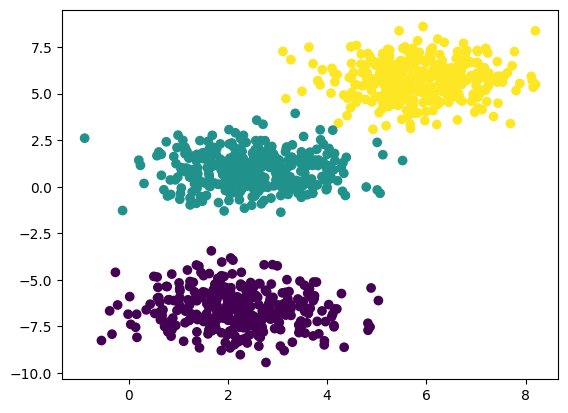

In [9]:
plt.scatter(x[:,0],x[:,1], c = y)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
from sklearn.cluster import KMeans

In [ ]:
##elbow method to select value of k
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)   #inertia is the wcss

In [18]:
wcss

[1340.000000000001,
 432.63172501246885,
 198.43425772190236,
 157.26882537855616,
 124.48136989732333,
 113.63805850703893,
 80.9627023641529,
 68.12591407850348,
 61.8454866927207,
 53.62295756650853]

Text(0, 0.5, 'Wcss')

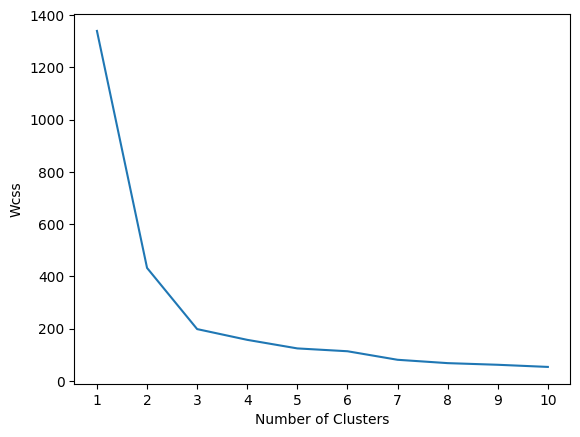

In [19]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")


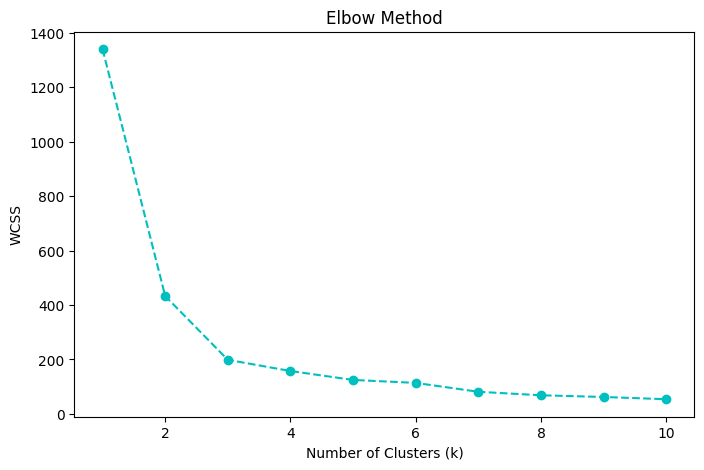

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='c')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3,init = "k-means++")

In [23]:
kmeans.fit_predict(x_train_scaled)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2,
       1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1,

In [24]:
y_pred = kmeans.predict(x_test_scaled)

In [25]:
y_pred

array([1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2,
       1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2,

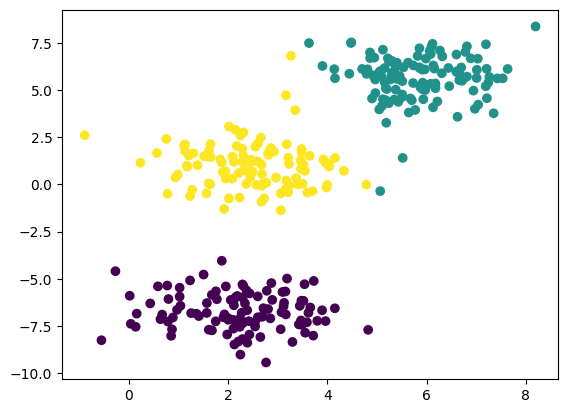

In [28]:
plt.scatter(x_test[:,0], x_test[:,1], c = y_pred)

In [ ]:
##validating the k value
##i) kneelocator
##ii) Silhoutee scoring

In [30]:
##i) kneelocator
!pip install kneed

In [31]:
from kneed import KneeLocator

In [33]:
kl = KneeLocator(range(1,11),wcss,curve="convex", direction="decreasing")

In [34]:
kl.elbow

np.int64(3)

In [ ]:
##silhoutte score
from sklearn.metrics import silhouette_score

In [36]:
silhouette_coeff = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [37]:
silhouette_coeff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)

In [41]:
silhouette_coeff

[np.float64(0.5907033186684066),
 np.float64(0.6057485595782843),
 np.float64(0.5067682592544716),
 np.float64(0.49463942119446996),
 np.float64(0.459368684311344),
 np.float64(0.4149486307148436),
 np.float64(0.4118355114372793),
 np.float64(0.39003425494853566),
 np.float64(0.38991607336283685)]

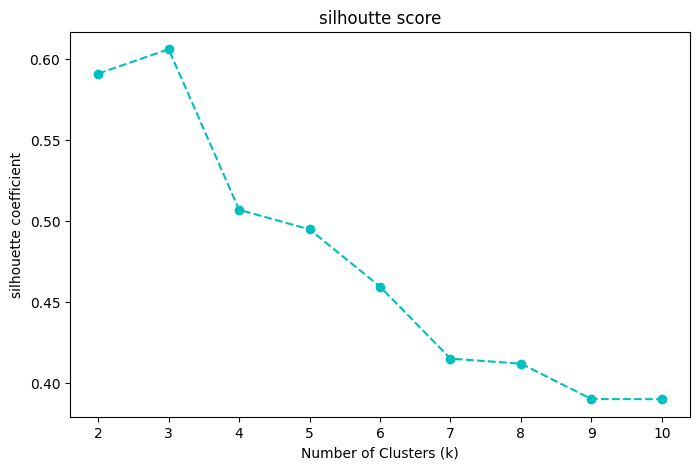

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_coeff, marker='o', linestyle='--', color='c')
plt.title("silhoutte score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette coefficient")
plt.show()